<a href="https://colab.research.google.com/github/kavyabanka/Youtube_Sentiment_Analysis/blob/main/YSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d pdkaggle16/youtube-comments

 33% 9.00M/27.5M [00:00<00:00, 50.3MB/s]
100% 27.5M/27.5M [00:00<00:00, 104MB/s] 


In [ ]:
!unzip -q youtube-comments.zip

In [ ]:
import pandas as pd
df = pd.read_csv('/content/GBcomments.csv', error_bad_lines=False)

<ipython-input-5-c8f4c99c6394>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/GBcomments.csv', error_bad_lines=False)
Skipping line 113225: expected 4 fields, saw 5

Skipping line 158379: expected 4 fields, saw 7
Skipping line 241590: expected 4 fields, saw 5
Skipping line 245637: expected 4 fields, saw 7

Skipping line 521402: expected 4 fields, saw 5



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from textblob import TextBlob

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 2.6 MB/s eta 0:00:00


In [ ]:
import emoji
df['comment_text'].fillna('', inplace=True)
text_with_textual_emojis = [emoji.demojize(comment) for comment in df['comment_text']]

In [ ]:
pol = []
for text in text_with_textual_emojis:
    try:
        analysis = TextBlob(text)
        pol.append(analysis.sentiment.polarity)
    except:
        pol.append(0)

In [ ]:
df['pol'] = pol
df['pol'] = np.where(df['pol'] == 0, 0, np.where(df['pol'] > 0, 1, -1))

In [ ]:
df_positive = df[df['pol'] == 1]
df_negative = df[df['pol'] == -1]
df_neutral = df[df['pol'] == 0]

In [ ]:
df.head()

,video_id,comment_text,likes,replies,pol
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,1
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1


In [ ]:
sub = []
for text in text_with_textual_emojis:
    try:
        analysis = TextBlob(text)
        sub.append(analysis.sentiment.subjectivity)
    except:
        sub.append(0)

In [ ]:
df['sub'] = sub

In [ ]:
df.head()

,video_id,comment_text,likes,replies,pol,sub
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,1,0.566667
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1,0.300000


In [ ]:
def classify_sentiment(polarity):
    if polarity == 1:
        return 'Positive'
    elif polarity == -1:
        return 'Negative'
    else:
        return 'Neutral'

df['pol'] = df['pol'].apply(classify_sentiment)

In [ ]:
df.head()

,video_id,comment_text,likes,replies,pol,sub
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,Positive,0.566667
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,Neutral,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,Neutral,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,Neutral,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,Positive,0.300000


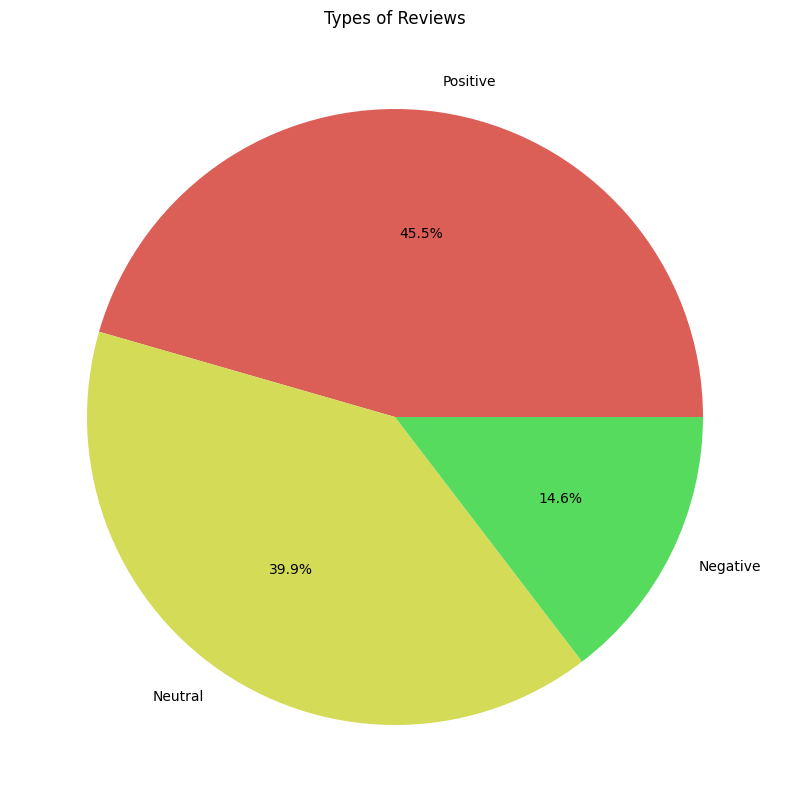

In [ ]:
plt.figure(figsize=(10, 10))
counts = df['pol'].value_counts()
labels = counts.index
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Types of Reviews')
plt.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=df['pol'].value_counts().index, y=df['pol'].value_counts())])
fig.update_layout(title='Type of Reviews',xaxis_title="Type",yaxis_title="Count")
fig.show()

In [ ]:
df['pol'].value_counts()

Positive    327150
Neutral     286335
Negative    104967
Name: pol, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Tokenization and vectorization using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(df['comment_text'])

In [ ]:
# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['pol'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_text, y_encoded, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

In [ ]:
# Predicting on the testing set
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Prompt influencer to input the video ID and strip any leading/trailing whitespace
video_id = input("Enter the video ID: ").strip()

# Filter comments related to the entered video ID
video_comments = df[df['video_id'] == video_id]

# Check if there are comments related to the entered video ID
if len(video_comments) == 0:
    print("No comments found for the entered video ID.")
else:
    # Calculate percentages of positive, negative, and neutral sentiments
    positive_percentage = (video_comments['pol'] == 'Positive').mean() * 100
    negative_percentage = (video_comments['pol'] == 'Negative').mean() * 100
    neutral_percentage = (video_comments['pol'] == 'Neutral').mean() * 100

    # Print percentages
    print("Sentiment percentages for video", video_id)
    print("Positive:", positive_percentage, "%")
    print("Negative:", negative_percentage, "%")
    print("Neutral:", neutral_percentage, "%")

    if positive_percentage > 0:
        # Identify most liked content if there are positive comments
        most_liked_content = video_comments[video_comments['pol'] == 'Positive']['comment_text'].value_counts().idxmax()
        print("\nMost liked content by users:")
        print(most_liked_content)

    # Provide suggestions or changes based on analysis
    if positive_percentage > 50:
        print("\nYour viewers seem to enjoy the content. Consider producing more similar content.")
    elif negative_percentage > 50:
        print("\nSome viewers have expressed negative sentiment. Consider analyzing feedback and making improvements.")
    else:
        print("\nThe sentiment distribution is balanced. Keep up the good work!")


In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df['video_id'].unique()